**FACE SHAPE CLASSIFICATION**

---


**MUHAMMAD ANUGRAH 221011090**\
**MUHAMMAD RIVALDI JEFRI 221011041**





In [117]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [118]:
train = ImageDataGenerator(rescale=1/255)

PENJELASAN:
Kode train = ImageDataGenerator(rescale=1/255) digunakan untuk membuat generator data yang menormalkan nilai piksel gambar dari rentang 0-255 menjadi 0-1. Ini dilakukan dengan membagi setiap nilai piksel dengan 255, yang merupakan langkah penting dalam deep learning untuk meningkatkan stabilitas dan efisiensi pelatihan model. Generator ini biasanya digunakan untuk memproses data gambar dalam jumlah besar secara otomatis, sering digabungkan dengan metode seperti flow_from_directory untuk memuat dan mengatur gambar ke dalam batch yang siap digunakan oleh model.

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
dataset_path = '/content/drive/MyDrive/NLP/VISIKOM/face'
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_dataset = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)

Found 98 images belonging to 7 classes.


PENJELASAN: Kode ini memuat dataset gambar dari folder yang ditentukan oleh dataset_path dan mengolahnya untuk pelatihan model deep learning. Gambar-gambar di dalam folder akan dinormalisasi ke rentang nilai 0-1 menggunakan rescale=1.0/255, diubah ukurannya menjadi 200x200 piksel, dan diproses dalam batch berisi 3 gambar per iterasi. Dengan class_mode='binary', dataset ini disiapkan untuk tugas klasifikasi biner.

In [122]:
train_dataset.class_indices

{'diamond': 0,
 'heart': 1,
 'oblong': 2,
 'oval': 3,
 'round': 4,
 'square': 5,
 'triangle': 6}

In [123]:
classess = ['diamond','heart','oblong','oval','round','square','triangle']

# Menggunakan CNN

In [124]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(200,200,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(7,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


PENJELASAN: Kode ini mendefinisikan model Convolutional Neural Network (CNN) menggunakan TensorFlow/Keras untuk klasifikasi gambar. Model terdiri dari tiga lapisan konvolusi dengan filter 64, 32, dan 32, masing-masing menggunakan kernel 3x3 untuk mengekstrak fitur gambar, dengan fungsi aktivasi ReLU. Padding diatur ke "same" untuk menjaga dimensi output, dan pooling layer dengan ukuran 2x2 digunakan untuk mengurangi dimensi data. Setelah fitur diekstraksi, lapisan flatten mengubah data menjadi bentuk vektor, yang kemudian diproses oleh lapisan dense dengan 7 neuron dan fungsi aktivasi softmax untuk menghasilkan prediksi probabilitas untuk 7 kelas.

In [126]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

PENJELASAN Kode ini mengkompilasi model CNN dengan menetapkan parameter untuk pelatihan. Optimizer yang digunakan adalah Adam, yang secara adaptif menyesuaikan learning rate selama pelatihan untuk meningkatkan efisiensi konvergensi. Loss function yang dipakai adalah sparse_categorical_crossentropy, cocok untuk tugas klasifikasi multi-kelas dengan label yang diberi angka (integer). Metrics diatur ke accuracy untuk memantau akurasi model selama pelatihan dan evaluasi. Kombinasi ini memastikan model dilatih secara optimal untuk menghasilkan prediksi yang akurat.

In [127]:
cnn.fit(train_dataset,epochs=10)

Epoch 1/10
 1/33 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.6667 - loss: 1.8100

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.1610 - loss: 1.9841
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.1570 - loss: 1.9505
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.1731 - loss: 1.9438
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.2081 - loss: 1.9308
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.1566 - loss: 1.9356
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.2022 - loss: 1.8828
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.2924 - loss: 1.8750
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.2453 - loss: 1.8302
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3252 - loss: 1.6813
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.4651 - loss: 1.4697


In [128]:
classess = ['diamond','heart','oblong','oval','round','square','triangle']

**PERCOBAAN PADA KELAS OVAL**

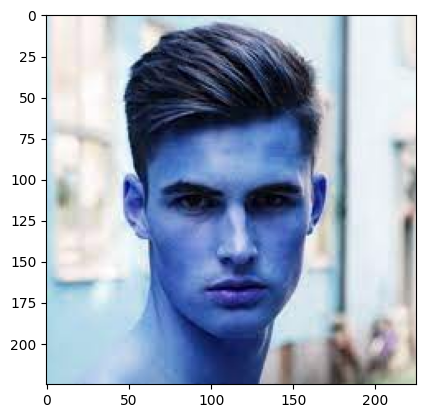

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
[[0. 0. 0. 1. 0. 0. 0.]]
3
oval


In [129]:
img = cv2.imread("/content/drive/MyDrive/NLP/VISIKOM/face/oval/download.jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(classes)
z = (np.argmax(classes))
print(z)
print(classess[z])

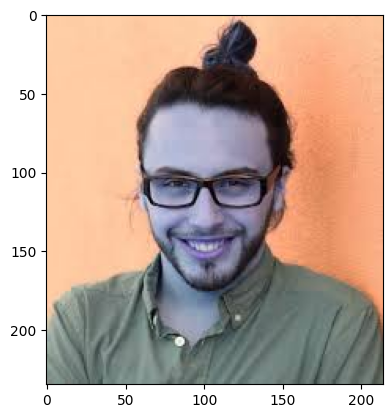

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 7.366061e-38
  0.000000e+00 0.000000e+00]]
3
oval


In [91]:
img = cv2.imread("/content/drive/MyDrive/NLP/VISIKOM/face/oval/images.jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(classes)
z = (np.argmax(classes))
print(z)
print(classess[z])

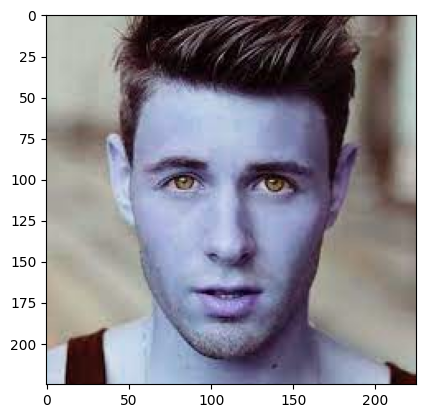

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
[[0.000000e+00 0.000000e+00 3.929563e-34 1.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00]]
3
oval


In [92]:
img = cv2.imread("/content/drive/MyDrive/NLP/VISIKOM/face/oval/download (1).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(classes)
z = (np.argmax(classes))
print(z)
print(classess[z])

**PERCOBAAN PADA KELAS OBLONG**

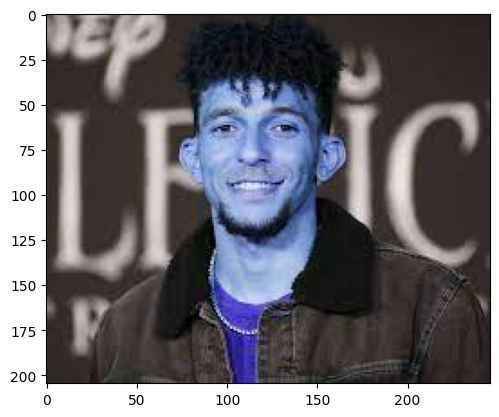

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0. 0. 1. 0. 0. 0. 0.]]
2
oblong


In [133]:
img = cv2.imread("/content/drive/MyDrive/NLP/VISIKOM/face/oblong/download (4).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(classes)
z = (np.argmax(classes))
print(z)
print(classess[z])

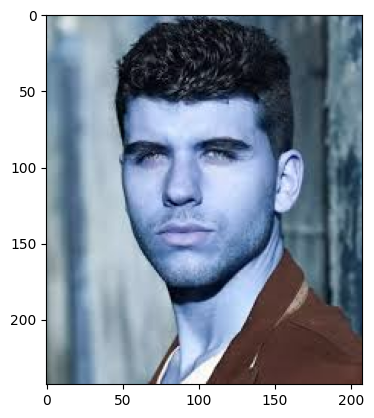

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.000000e+00 0.000000e+00 1.000000e+00 5.832128e-30 0.000000e+00
  0.000000e+00 0.000000e+00]]
2
oblong


In [131]:
img = cv2.imread("/content/drive/MyDrive/NLP/VISIKOM/face/oblong/images (1).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(classes)
z = (np.argmax(classes))
print(z)
print(classess[z])

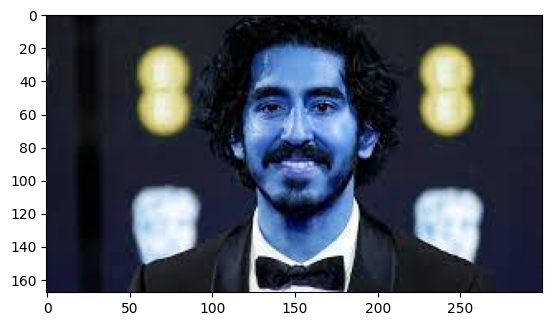

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0. 0. 1. 0. 0. 0. 0.]]
2
oblong


In [132]:
img = cv2.imread("/content/drive/MyDrive/NLP/VISIKOM/face/oblong/download (5).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(classes)
z = (np.argmax(classes))
print(z)
print(classess[z])

**PERCOBAAN PADA KELAS SQUARE**

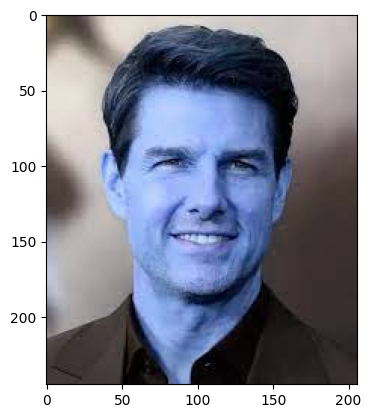

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[0. 0. 0. 0. 0. 1. 0.]]
5
square


In [44]:
img = cv2.imread("/content/drive/MyDrive/NLP/VISIKOM/face/square/download (5).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(classes)
z = (np.argmax(classes))
print(z)
print(classess[z])

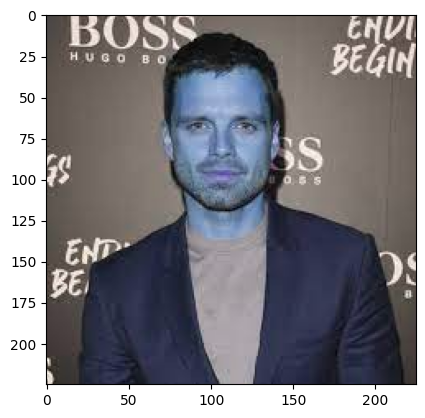

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0. 0. 0. 0. 0. 1. 0.]]
5
square


In [48]:
img = cv2.imread("/content/drive/MyDrive/NLP/VISIKOM/face/square/download (2)1.jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(classes)
z = (np.argmax(classes))
print(z)
print(classess[z])

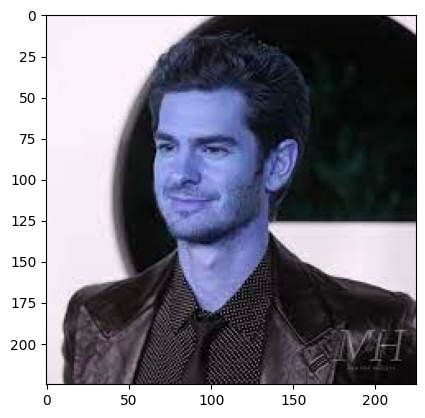

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0. 0. 0. 0. 0. 1. 0.]]
5
square


In [134]:
img = cv2.imread("/content/drive/MyDrive/NLP/VISIKOM/face/square/download (2).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = cnn.predict(img)
print(classes)
z = (np.argmax(classes))
print(z)
print(classess[z])

In [112]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [113]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int32)

<Axes: ylabel='count'>

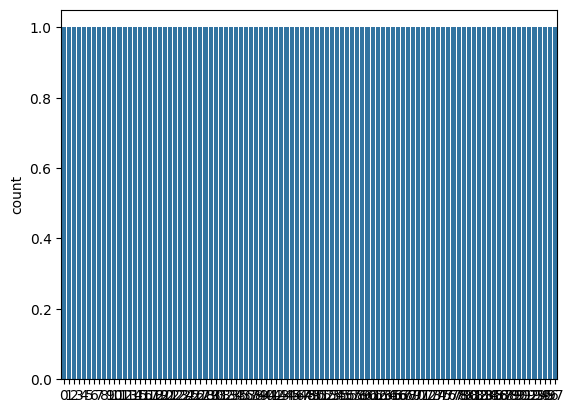

In [114]:
sns.countplot(train_dataset.classes)